In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import *

import pandas_profiling


ImportError: No module named pandas_profiling

## read csv

In [5]:
df = pd.read_csv("01.2011_Census_Microdata.csv", index_col = 0)

##  將資料轉成類型

In [6]:
df['Sex'] = df['Sex'].astype('category')
# df['Sex'].cat.categories = ["%s" % 'MALEs' if g==1 else 'FEMALEs' for g in df['Sex'].cat.categories]
# df['Sex'][:4]

In [7]:
df._get_numeric_data().columns

Index([u'Family Composition', u'Population Base', u'Age', u'Marital Status',
       u'Student', u'Country of Birth', u'Health', u'Ethnic Group',
       u'Religion', u'Economic Activity', u'Occupation', u'Industry',
       u'Hours worked per week', u'Approximated Social Grade'],
      dtype='object')

In [8]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        df[column_name] = df[column_name].astype('category')
        print(column_name, ": ", get_var_category(df[column_name]))

In [9]:
df1 = df.copy()
print_categories(df1)

('Region', ': ', 'Categorical')
('Residence Type', ': ', 'Categorical')
('Family Composition', ': ', 'Categorical')
('Population Base', ': ', 'Categorical')
('Sex', ': ', 'Categorical')
('Age', ': ', 'Categorical')
('Marital Status', ': ', 'Categorical')
('Student', ': ', 'Categorical')
('Country of Birth', ': ', 'Categorical')
('Health', ': ', 'Categorical')
('Ethnic Group', ': ', 'Categorical')
('Religion', ': ', 'Categorical')
('Economic Activity', ': ', 'Categorical')
('Occupation', ': ', 'Categorical')
('Industry', ': ', 'Categorical')
('Hours worked per week', ': ', 'Categorical')
('Approximated Social Grade', ': ', 'Categorical')


In [10]:
length = len(df1['Sex'])
print(length)
# len(df1['Country of Birth']==-9])
type(df1['Country of Birth'])

569741


pandas.core.series.Series

In [11]:
df1.describe()

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
count,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741,569741
unique,10,2,7,3,2,8,5,2,3,6,6,10,10,10,13,5,5
top,E12000008,H,2,1,2,1,1,2,1,1,1,2,1,-9,-9,-9,2
freq,88084,559087,300962,561040,289172,106832,270999,443204,485645,264971,483477,333481,216025,149984,149984,302321,159642


In [12]:

import pandas_profiling 
# pandas_profiling.ProfileReport(df1)

ImportError: No module named pandas_profiling

## 敘述性統計

In [13]:
df.describe()

,Family Composition,Population Base,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
count,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000
mean,2.011870,1.018731,3.978680,1.856201,1.777904,1.016239,1.658324,1.191250,2.419387,0.685597,1.240994,2.459844,-3.487095,0.034130
std,2.358788,0.159058,2.219494,1.125020,0.415655,1.153095,1.486598,1.391858,2.493064,5.265465,6.521825,7.398945,5.887539,4.862672
min,-9.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000
50%,2.000000,1.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,-9.000000,2.000000
75%,3.000000,1.000000,6.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,5.000000,6.000000,8.000000,3.000000,3.000000
max,6.000000,3.000000,8.000000,5.000000,2.000000,2.000000,5.000000,5.000000,9.000000,9.000000,9.000000,12.000000,4.000000,4.000000


## hoe many column & row

In [14]:
df.shape

(569741, 17)

## 欄位名稱

In [15]:
df.columns

Index([u'Region', u'Residence Type', u'Family Composition', u'Population Base',
       u'Sex', u'Age', u'Marital Status', u'Student', u'Country of Birth',
       u'Health', u'Ethnic Group', u'Religion', u'Economic Activity',
       u'Occupation', u'Industry', u'Hours worked per week',
       u'Approximated Social Grade'],
      dtype='object')

## Region 分類

In [16]:
df['Region'].value_counts()

E12000008    88084
E12000007    83582
E12000002    71436
E12000006    59411
E12000005    56875
E12000009    53774
E12000003    53471
E12000004    45782
W92000004    30977
E12000001    26349
Name: Region, dtype: int64

In [17]:
df['Age'].value_counts()

1    106832
4     78641
5     77388
3     75948
2     72785
6     65666
7     48777
8     43704
Name: Age, dtype: int64

> 整個資料的 missing value 已經設定成 -9

In [18]:
df['Country of Birth'].value_counts(dropna=False)

 1    485645
 2     77292
-9      6804
Name: Country of Birth, dtype: int64

In [19]:
df['Health'].value_counts(dropna=False)

 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
-9      6804
Name: Health, dtype: int64

In [20]:
a = df['Residence Type'].value_counts(dropna=False)
type(a)
a


H    559087
C     10654
Name: Residence Type, dtype: int64

In [21]:
a = pd.isnull(df).head()
dict(a)
a.Age
a.Health

Person ID
7394816    False
7394745    False
7395066    False
7395329    False
7394712    False
Name: Health, dtype: bool

In [22]:
a

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Person ID,,,,,,,,,,,,,,,,,
7394816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7394745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7395066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7395329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7394712,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.index

Int64Index([7394816, 7394745, 7395066, 7395329, 7394712, 7394750, 7394871,
            7394832, 7394719, 7394840,
            ...
            7944616, 7946558, 7944827, 7944370, 7944868, 7946020, 7944310,
            7945374, 7944768, 7944959],
           dtype='int64', name=u'Person ID', length=569741)

In [14]:
df.iloc[:6 ,:3 ]

,Region,Residence Type,Family Composition
Person ID,,,
7394816,E12000001,H,2
7394745,E12000001,H,5
7395066,E12000001,H,3
7395329,E12000001,H,3
7394712,E12000001,H,3
7394750,E12000001,H,2


In [15]:
df.tail(7)

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
Person ID,,,,,,,,,,,,,,,,,
7944370,W92000004,H,1,1,1,3,3,1,2,3,4,6,4,9,6,2,2
7944868,W92000004,H,2,1,1,2,1,2,1,1,1,2,1,4,9,3,2
7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4
7944959,W92000004,H,2,1,2,2,2,2,1,2,1,1,1,7,4,1,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569741 entries, 7394816 to 7944959
Data columns (total 17 columns):
Region                       569741 non-null object
Residence Type               569741 non-null object
Family Composition           569741 non-null int64
Population Base              569741 non-null int64
Sex                          569741 non-null int64
Age                          569741 non-null int64
Marital Status               569741 non-null int64
Student                      569741 non-null int64
Country of Birth             569741 non-null int64
Health                       569741 non-null int64
Ethnic Group                 569741 non-null int64
Religion                     569741 non-null int64
Economic Activity            569741 non-null int64
Occupation                   569741 non-null int64
Industry                     569741 non-null int64
Hours worked per week        569741 non-null int64
Approximated Social Grade    569741 non-null int64
dtypes: int64

In [29]:
df.values

array([['E12000001', 'H', 2, ..., 2, -9, 4],
       ['E12000001', 'H', 5, ..., 6, 4, 3],
       ['E12000001', 'H', 3, ..., 11, 3, 4],
       ..., 
       ['W92000004', 'H', 3, ..., -9, -9, -9],
       ['W92000004', 'H', 1, ..., 2, -9, 4],
       ['W92000004', 'H', 2, ..., 4, 1, 4]], dtype=object)

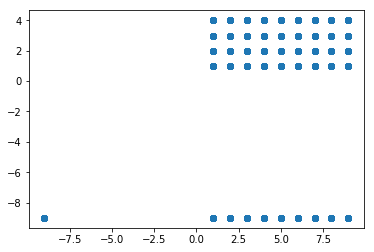

In [16]:
plt.scatter(df['Occupation'],y=df['Hours worked per week'])
# df.plot.scatter(x=df['Occupation'],y=df['Hours worked per week'] )
# df.plot(kind='scatter', x='Occupation', y='Hours worked per week')
plt.show()

In [48]:
# df[df['Approximated Social Grade']==1].count()
df['Approximated Social Grade'].value_counts(dropna=False)
# df[df['Approximated Social Grade']==1].value_counts()
# df[df['Approximated Social Grade'],]


 2    159642
-9    124103
 4    123740
 1     82320
 3     79936
Name: Approximated Social Grade, dtype: int64

In [35]:
pd.pivot_table(df, values='Approximated Social Grade', index=['Sex'], columns=['Marital Status'])


Marital Status,1,2,3,4,5
Sex,,,,,
1,-2.433017,2.371399,2.433851,2.54073,2.179261
2,-2.738187,2.410481,2.763695,2.63659,2.144283


In [57]:
df['Approximated Social Grade'][:7]
df.groupby('Approximated Social Grade').size()
type(df.groupby('Approximated Social Grade'))

pandas.core.groupby.DataFrameGroupBy

## 當Social Grade是屬於中高階層的人，其婚姻狀況分佈

In [62]:
df1 = df.copy()
df1['Marital Status'][df1['Marital Status']==1] = "Single"
df1['Marital Status'][df1['Marital Status']==2] = "Married"
df1['Marital Status'][df1['Marital Status']==3] = "Separated"
df1['Marital Status'][df1['Marital Status']==4] = "Divorced"
df1['Marital Status'][df1['Marital Status']==5] = "Widow"



isAB = df1['Approximated Social Grade']==1

k = df1[isAB]

a = k['Marital Status'].value_counts()




/Users/tp6han/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


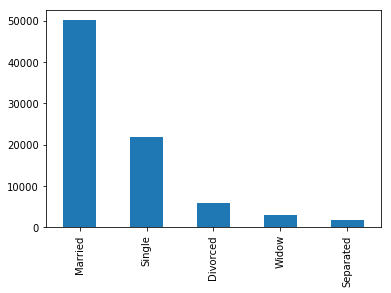

In [63]:
fig, ax = subplots()
a.plot(kind='bar')
# ax.legend()
# ax.set_xticklabels(["Single", "Married","Separated","Divorced","Widow"], rotation=0)
plt.show()

In [24]:
df2 = df.copy()
# char_sex = df2['Sex'].astype(str) 
my_tab = pd.crosstab(index=df2['Sex'], columns="count")  
my_tab

col_0,count
Sex,
1,280569
2,289172


In [25]:
b = pd.crosstab(index=df2['Marital Status'], columns="count") 
b/b.sum()

col_0,count
Marital Status,
1,0.475653
2,0.375925
3,0.020976
4,0.071459
5,0.055987


# Two-Way Tables
## Two-way frequency tables, also called **contingency tables**, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables to the pd.crosstab() function instead of one:

## One-Way Tables

In [26]:
marital_sex = pd.crosstab(index=df2["Marital Status"], 
                           columns=df2["Approximated Social Grade"])


print(marital_sex)
marital_sex/marital_sex.sum()

Approximated Social Grade      -9      1      2      3      4
Marital Status                                               
1                          119915  21824  67313  23312  38635
2                            1341  50091  66721  43497  52530
3                             136   1701   3639   2304   4171
4                             455   5793  12981   7920  13564
5                            2256   2911   8988   2903  14840


Approximated Social Grade,-9,1,2,3,4
Marital Status,,,,,
1,0.966254,0.265112,0.421650,0.291633,0.312227
2,0.010806,0.608491,0.417941,0.544148,0.424519
3,0.001096,0.020663,0.022795,0.028823,0.033708
4,0.003666,0.070372,0.081313,0.099079,0.109617
5,0.018178,0.035362,0.056301,0.036317,0.119929


## Two-Way Tables

In [27]:
pd.crosstab(index=df2["Religion"], columns=df2["Age"])

Age,1,2,3,4,5,6,7,8
Religion,,,,,,,,
-9,1018,5572,185,14,8,4,0,3
1,32026,23890,26178,23436,17342,10826,5063,2897
2,53261,31918,35171,42983,49424,46368,38308,36048
3,261,361,534,536,396,292,104,54
4,1465,1067,1978,1231,1079,753,411,230
5,524,272,343,318,281,310,240,284
6,8935,4222,5450,4130,2225,1230,647,401
7,856,569,839,648,544,419,223,117
8,229,245,406,444,478,378,162,64


In [28]:
pd.crosstab(index=df2["Region"], columns=df2["Age"] , margins=True)

Age,1,2,3,4,5,6,7,8,All
Region,,,,,,,,,
E12000001,4771,3425,3181,3414,3847,3361,2263,2087,26349
E12000002,13266,9339,8999,9567,9862,8569,6400,5434,71436
E12000003,9939,7164,6729,7313,7346,6255,4645,4080,53471
E12000004,8474,5819,5309,6195,6608,5648,4112,3617,45782
E12000005,11095,7282,7224,7726,7516,6529,5068,4435,56875
E12000006,11085,7077,7327,8295,8186,7052,5475,4914,59411
E12000007,16581,10966,16672,12872,10247,7126,4777,4341,83582
E12000008,16645,11015,10735,12311,12179,10314,7634,7251,88084
E12000009,9332,6609,6143,6977,7391,6921,5422,4979,53774


In [66]:
a = pd.crosstab(index= df2["Health"],columns=df2["Religion"])
a.columns = ['No code required','No religion','Christian','Buddhist','Hindu','Jewish','Muslim','Sikh','Other religion','Not stated']
a




,No code required,No religion,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,Not stated
Health,,,,,,,,,,
-9,6804,0,0,0,0,0,0,0,0,0
1,0,76041,147445,1156,4050,1419,13750,1961,872,18277
2,0,47287,114856,989,3001,717,9060,1520,859,13455
3,0,13086,50077,282,830,312,2957,527,430,5979
4,0,4086,16367,83,252,84,1144,171,196,2175
5,0,1158,4736,28,81,40,329,36,49,727


In [74]:
survived_class = pd.crosstab(index= df2["Health"],columns=df2["Religion"])
survived_class/survived_class.sum()

Religion,-9,1,2,3,4,5,6,7,8,9
Health,,,,,,,,,,
-9,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.536793,0.442139,0.455477,0.493061,0.551711,0.504772,0.465243,0.362427,0.450028
2,0.0,0.333811,0.344415,0.389677,0.365352,0.278771,0.332599,0.360617,0.357024,0.331298
3,0.0,0.092377,0.150164,0.111111,0.101047,0.121306,0.108554,0.125030,0.178720,0.147219
4,0.0,0.028844,0.049079,0.032703,0.030679,0.032659,0.041997,0.040569,0.081463,0.053554
5,0.0,0.008175,0.014202,0.011032,0.009861,0.015552,0.012078,0.008541,0.020366,0.017901


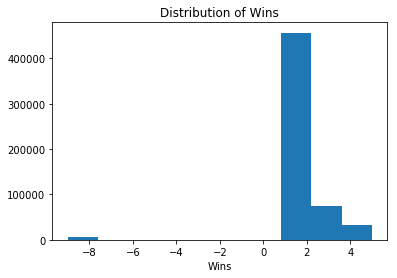

In [29]:
plt.hist(df['Health'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()